In [1]:
import pandas as pd
import psycopg2

conn = psycopg2.connect(
    dbname="pf_mtg",
    user="luisjimse",
    password="admin",
    host="localhost",
    port="5432"
)

query = """
SELECT o.*, c.nombre_carta, e.nombre_edicion, s.nombre_seller
FROM ofertas o
JOIN cartas c ON o.id_carta = c.id_carta
JOIN edicion e ON o.id_edicion = e.id_edicion
JOIN sellers s ON o.id_seller = s.id_seller
"""
df = pd.read_sql(query, conn)


/var/folders/7h/3lv1slyd33dc0tb3lck5tb2c0000gn/T/ipykernel_48025/2616081050.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11220 entries, 0 to 11219
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_oferta       11220 non-null  int64  
 1   condition       11220 non-null  object 
 2   language        11220 non-null  object 
 3   price           11220 non-null  float64
 4   quantity        11220 non-null  int64  
 5   id_carta        11220 non-null  int64  
 6   id_edicion      11220 non-null  int64  
 7   id_seller       11220 non-null  int64  
 8   nombre_carta    11220 non-null  object 
 9   nombre_edicion  11220 non-null  object 
 10  nombre_seller   11220 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 964.3+ KB


In [3]:
df.describe()

,id_oferta,price,quantity,id_carta,id_edicion,id_seller
count,11220.000000,11220.000000,11220.000000,11220.000000,11220.000000,11220.000000
mean,5610.500000,1.631788,4.896881,1315.153654,7.170945,2.648396
std,3239.079345,8.167551,2.663090,846.761465,3.864725,0.976410
min,1.000000,0.020000,1.000000,1.000000,1.000000,1.000000
25%,2805.750000,0.150000,3.000000,582.000000,4.000000,2.000000
50%,5610.500000,0.200000,4.000000,1266.000000,7.000000,3.000000
75%,8415.250000,0.350000,8.000000,1968.000000,10.000000,3.000000
max,11220.000000,100.000000,19.000000,3159.000000,14.000000,4.000000


In [4]:
df.isnull().sum()

id_oferta         0
condition         0
language          0
price             0
quantity          0
id_carta          0
id_edicion        0
id_seller         0
nombre_carta      0
nombre_edicion    0
nombre_seller     0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

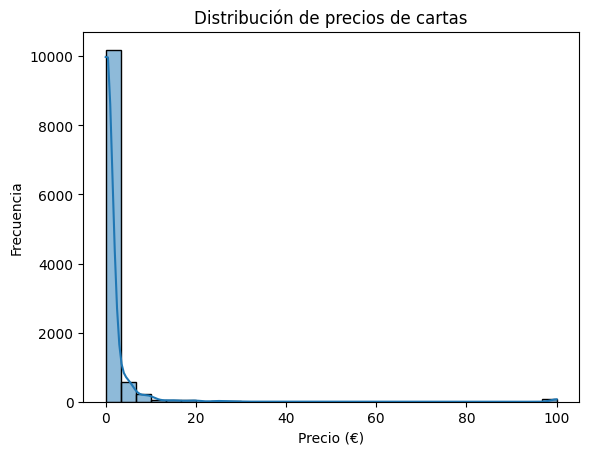

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribución de precios de cartas')
plt.xlabel('Precio (€)')
plt.ylabel('Frecuencia')
plt.show()


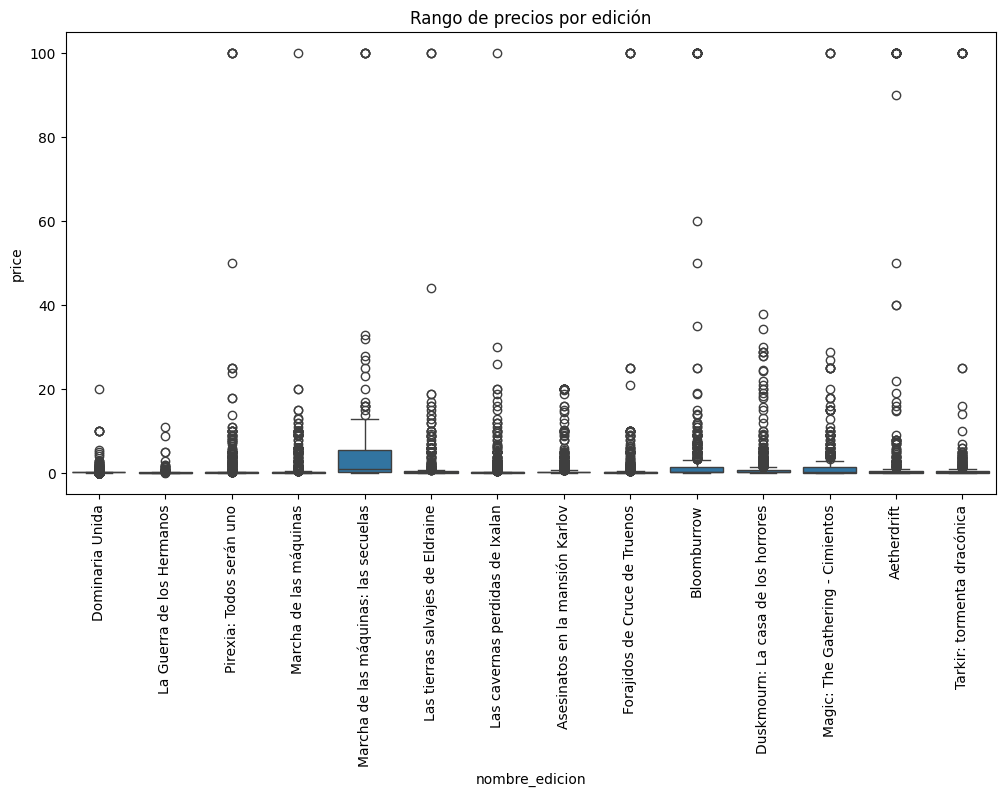

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='nombre_edicion', y='price')
plt.xticks(rotation=90)
plt.title('Rango de precios por edición')
plt.show()


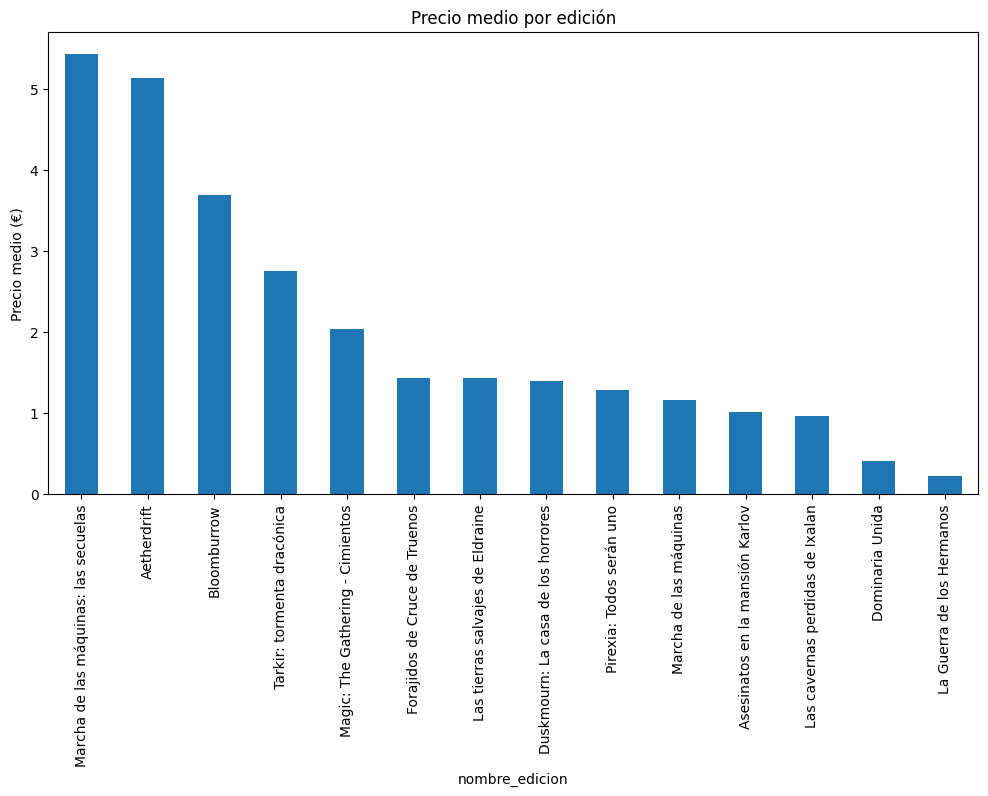

In [9]:
precios_edicion = df.groupby('nombre_edicion')['price'].mean().sort_values(ascending=False)
precios_edicion.plot(kind='bar', figsize=(12,6), title='Precio medio por edición')
plt.ylabel('Precio medio (€)')
plt.show()


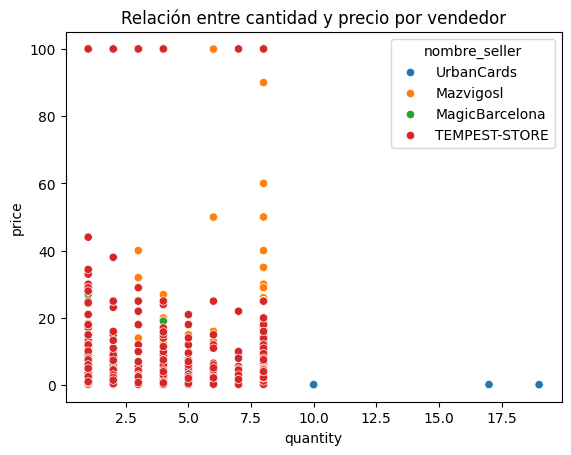

In [10]:
sns.scatterplot(data=df, x='quantity', y='price', hue='nombre_seller')
plt.title('Relación entre cantidad y precio por vendedor')
plt.show()


In [11]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1
outliers = df[(df['price'] < q1 - 1.5*iqr) | (df['price'] > q3 + 1.5*iqr)]

print(f"Número de outliers detectados: {len(outliers)}")


Número de outliers detectados: 2244


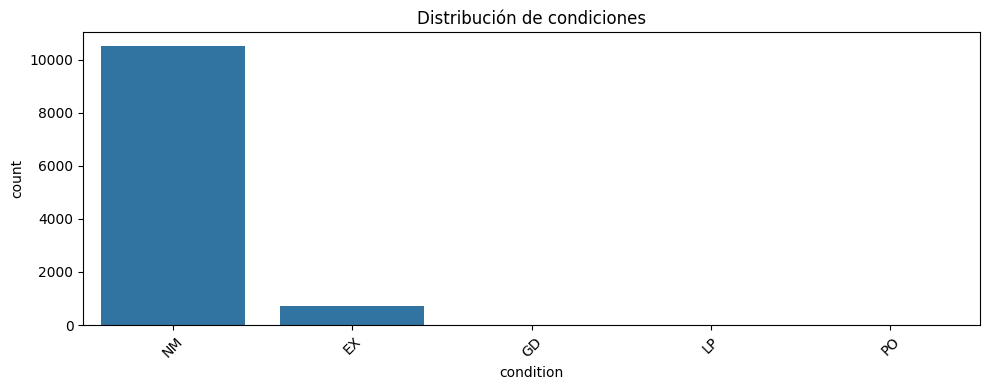

In [12]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='condition', order=df['condition'].value_counts().index)
plt.title("Distribución de condiciones")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

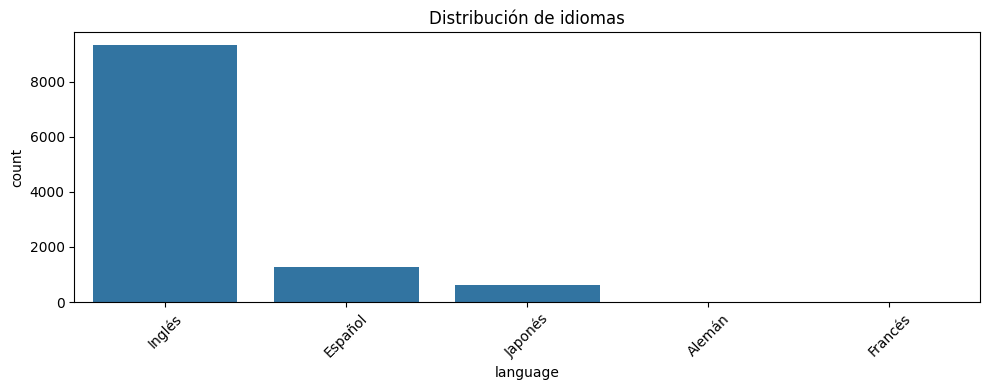

In [13]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='language', order=df['language'].value_counts().index)
plt.title("Distribución de idiomas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

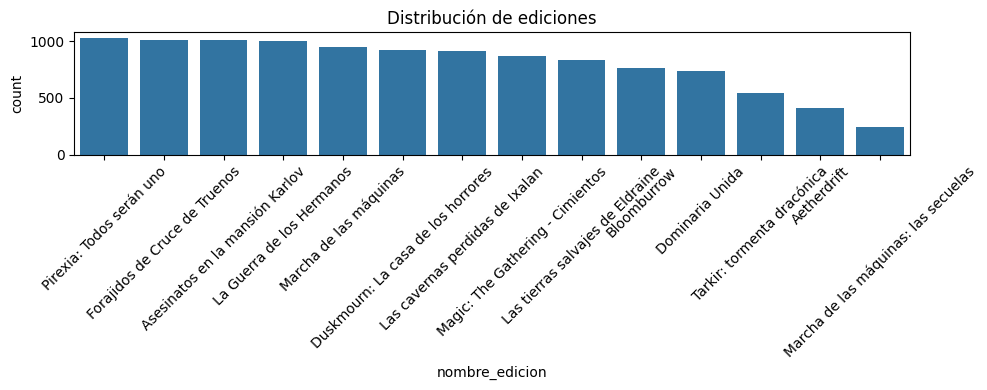

In [14]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='nombre_edicion', order=df['nombre_edicion'].value_counts().index)
plt.title("Distribución de ediciones")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

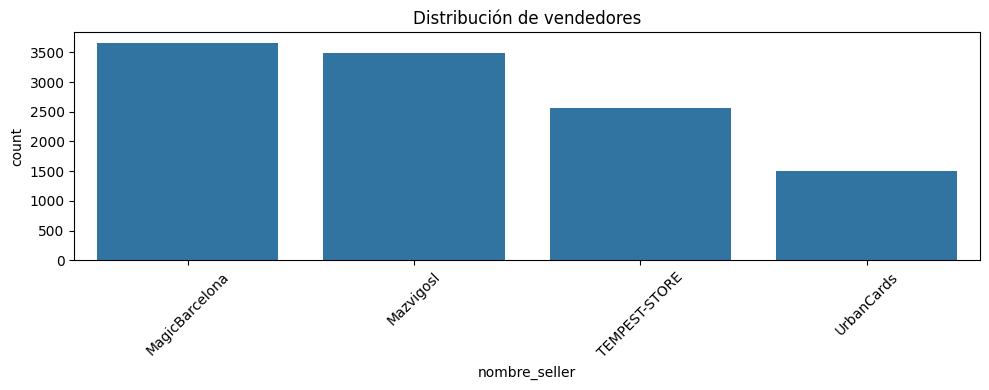

In [15]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='nombre_seller', order=df['nombre_seller'].value_counts().index)
plt.title("Distribución de vendedores")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

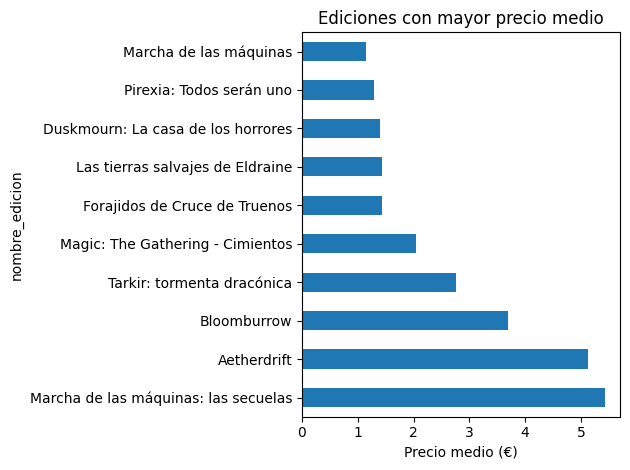

In [16]:
# Precio medio por edición
df.groupby("nombre_edicion")["price"].mean().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Ediciones con mayor precio medio")
plt.xlabel("Precio medio (€)")
plt.tight_layout()
plt.show()
